In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Import the dataset
data = pd.read_csv('dataset/City_Air_Quality.csv')
print(data.head())
print(data.info())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

In [3]:
data['Data'] = pd.to_datetime(data['Date'])

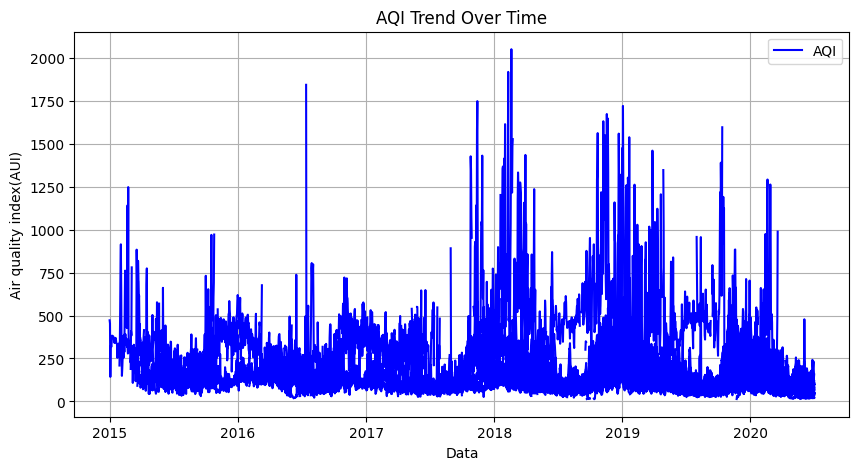

In [4]:
plt.figure(figsize =(10,5))
plt.plot(data['Data'], data['AQI'], label='AQI', color = 'blue')
plt.xlabel('Data')
plt.ylabel('Air quality index(AUI)')
plt.title('AQI Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

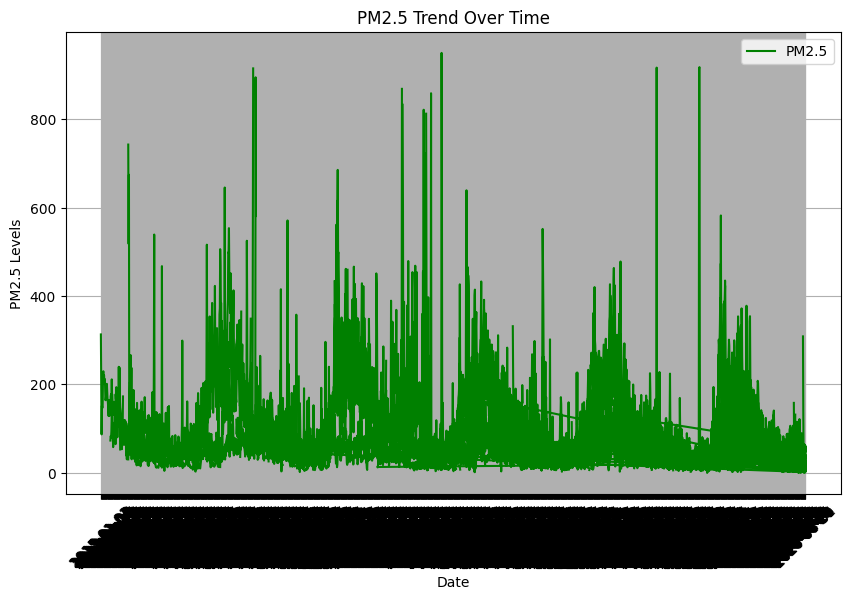

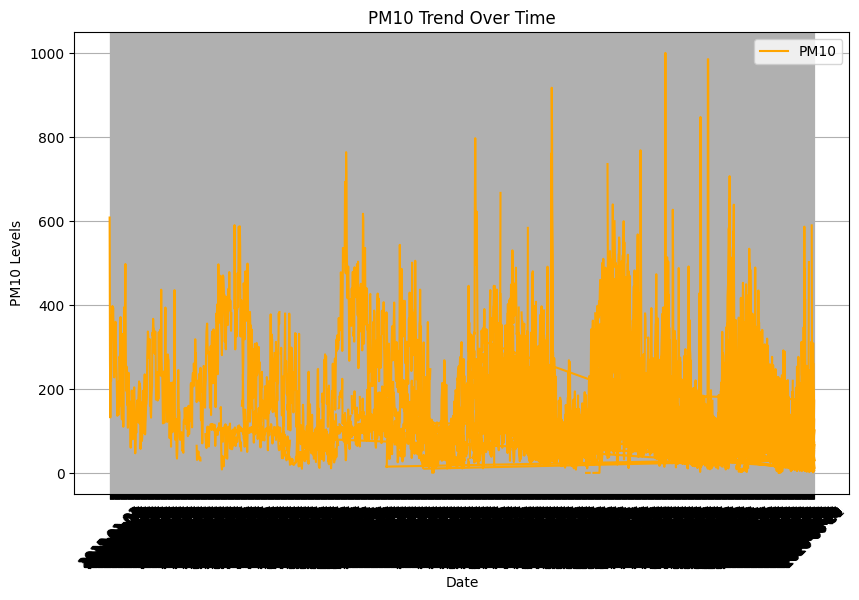

In [5]:

# Plotting PM2.5
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['PM2.5'], color='green', label='PM2.5')
plt.title('PM2.5 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting PM10
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['PM10'], color='orange', label='PM10')
plt.title('PM10 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM10 Levels')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting CO
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['CO'], color='red', label='CO')
plt.title('CO Trend Over Time')
plt.xlabel('Date')
plt.ylabel('CO Levels')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

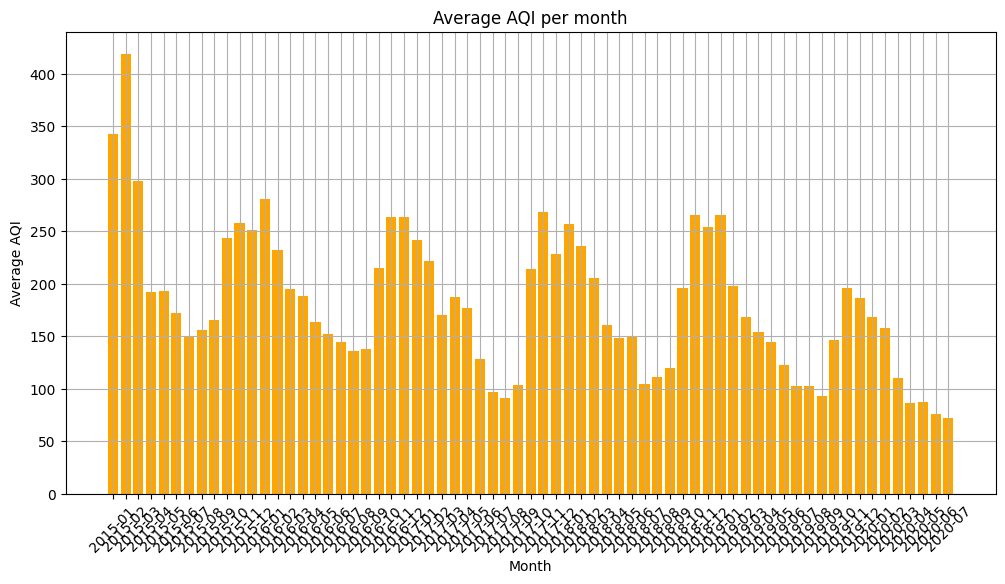

In [6]:
# Convert 'Date' column to datetime (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Now you can use the .dt accessor to create the 'Month' column
data['Month'] = data['Date'].dt.to_period('M')

# Group by 'Month' and calculate the average AQI
avg_aqi_per_month = data.groupby('Month')['AQI'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12,6))
plt.bar(avg_aqi_per_month['Month'].astype(str), avg_aqi_per_month['AQI'], color = 'orange')
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average AQI per month')
plt.grid(True)
plt.show()


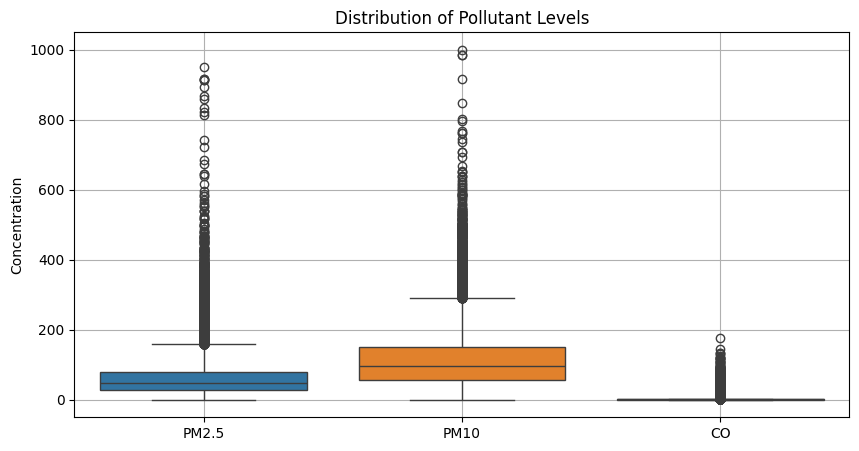

In [7]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = data[['PM2.5', 'PM10', 'CO']])
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

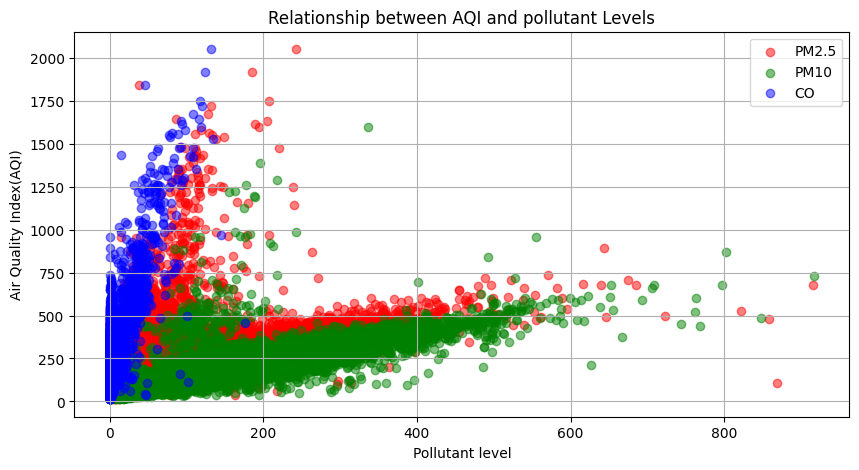

In [8]:
plt.figure(figsize = (10, 5))
plt.scatter(data['PM2.5'], data['AQI'], label='PM2.5', alpha=0.5, color = 'red')
plt.scatter(data['PM10'], data['AQI'], label='PM10', alpha=0.5, color = 'green')
plt.scatter(data['CO'], data['AQI'], label='CO', alpha=0.5, color = 'blue')
plt.xlabel('Pollutant level')
plt.ylabel('Air Quality Index(AQI)')
plt.title('Relationship between AQI and pollutant Levels')
plt.legend()
plt.grid(True)
plt.show()